# Jonathan Halverson
# Wednesday, February 1, 2017
# Basics of NetworkX

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# create an empty undirected graph
G = nx.Graph()

In NetworkX, nodes can be any hashable object e.g. a text string, an image, an XML object, another Graph, a customized node object, etc. Loosely this means any immutable object. The idea is that the hash function returns a unique value for a given object i.e., no collisions. It is possible to make a graph where the nodes are graphs themselves.

### Create a new graph by specifying the nodes

In [3]:
G.add_node('New York')

In [4]:
G.add_nodes_from(['Boston', 'San Francisco', 'San Diego'])

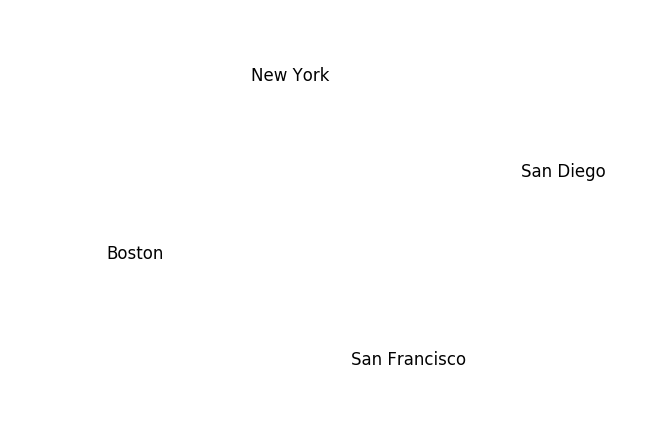

In [5]:
nx.draw(G, node_size=0, edge_color='b', alpha=0.2, font_size=12, with_labels=True)

### Create a built-in graph

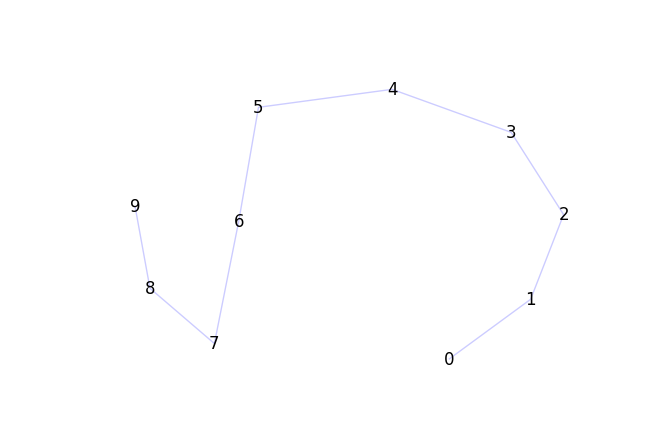

In [6]:
H = nx.path_graph(10)
nx.draw(H, node_size=0, edge_color='b', alpha=0.2, font_size=12, with_labels=True)

In [7]:
G.add_edge('New York', 'Boston')
G.add_edges_from([('New York', 'San Francisco'), ('New York', 'San Diego')])

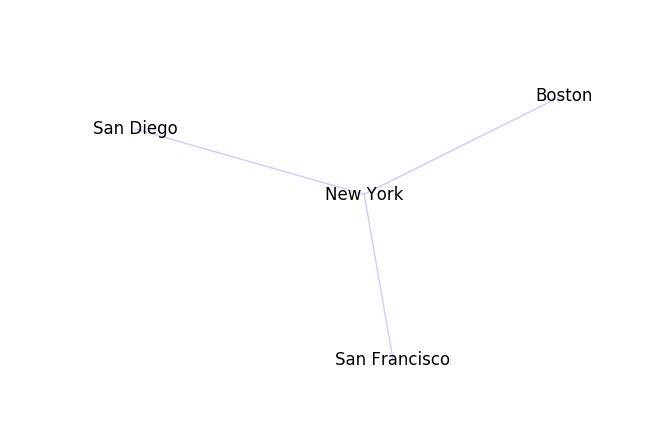

In [8]:
nx.draw(G, node_size=0, edge_color='b', alpha=0.2, font_size=12, with_labels=True)

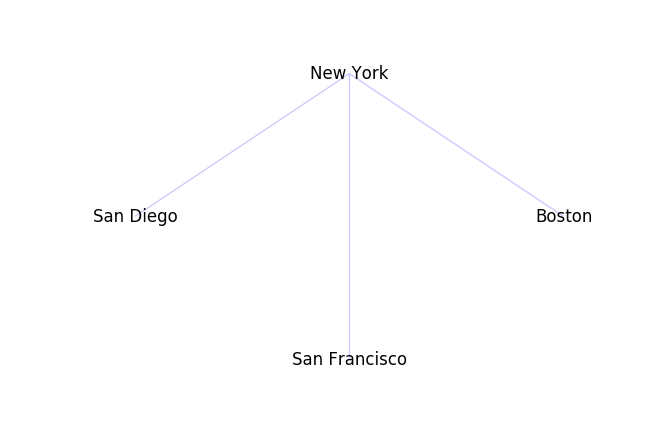

In [9]:
nx.draw_circular(G, node_size=0, edge_color='b', alpha=0.2, font_size=12, with_labels=True)

In [10]:
nx.shortest_path(G, 'San Francisco', 'Boston')

['San Francisco', 'New York', 'Boston']

In [11]:
nx.degree_centrality(G)

{'Boston': 0.3333333333333333,
 'New York': 1.0,
 'San Diego': 0.3333333333333333,
 'San Francisco': 0.3333333333333333}

In [12]:
nx.pagerank(G)

{'Boston': 0.1734231420045456,
 'New York': 0.4797305739863632,
 'San Diego': 0.1734231420045456,
 'San Francisco': 0.1734231420045456}

In [13]:
G.number_of_nodes(), G.number_of_edges()

(4, 3)

In [14]:
G.nodes()

['Boston', 'New York', 'San Diego', 'San Francisco']

In [15]:
G.edges()

[('Boston', 'New York'),
 ('New York', 'San Diego'),
 ('New York', 'San Francisco')]

In [16]:
G.neighbors('New York')

['Boston', 'San Diego', 'San Francisco']

### Create a new graph using only the edges

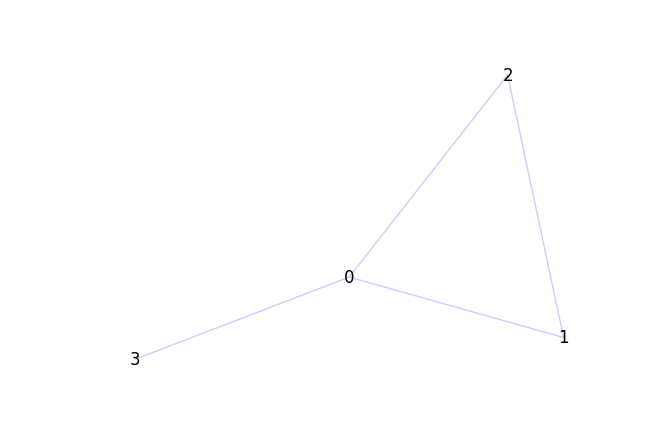

In [17]:
K = nx.Graph([(0, 1), (0, 2), (1, 2), (0, 3)])
nx.draw(K, node_size=0, edge_color='b', alpha=0.2, font_size=12, with_labels=True)

In [18]:
nx.pagerank(K)

{0: 0.36673529905297914,
 1: 0.2459279727012903,
 2: 0.2459279727012903,
 3: 0.14140875554444032}

In [19]:
help(G.add_edge)

Help on method add_edge in module networkx.classes.graph:

add_edge(self, u, v, attr_dict=None, **attr) method of networkx.classes.graph.Graph instance
    Add an edge between u and v.
    
    The nodes u and v will be automatically added if they are
    not already in the graph.
    
    Edge attributes can be specified with keywords or by providing
    a dictionary with key/value pairs.  See examples below.
    
    Parameters
    ----------
    u,v : nodes
        Nodes can be, for example, strings or numbers.
        Nodes must be hashable (and not None) Python objects.
    attr_dict : dictionary, optional (default= no attributes)
        Dictionary of edge attributes.  Key/value pairs will
        update existing data associated with the edge.
    attr : keyword arguments, optional
        Edge data (or labels or objects) can be assigned using
        keyword arguments.
    
    See Also
    --------
    add_edges_from : add a collection of edges
    
    Notes
    -----
    Addi

In [20]:
G['New York']

{'Boston': {}, 'San Diego': {}, 'San Francisco': {}}

In [21]:
G['New York']['San Diego']['length'] = 3000.0

In [22]:
for edge in G.edges_iter():
    print edge

('Boston', 'New York')
('New York', 'San Diego')
('New York', 'San Francisco')


In [23]:
for (u, v, d) in G.edges(data='length'):
    print u, v, d

Boston New York {}
New York San Diego {'length': 3000.0}
New York San Francisco {}


### Graph attributes

In [24]:
G.graph['title'] = 'Some Cities on Earth'
G.graph

{'title': 'Some Cities on Earth'}

### Node attributes

In [25]:
G.node['New York']['Population'] = 1e6

In [26]:
G.nodes(data=True)

[('Boston', {}),
 ('New York', {'Population': 1000000.0}),
 ('San Diego', {}),
 ('San Francisco', {})]

### Edge attributes

In [27]:
G['New York']['San Francisco']['weight'] = 10.0
G.edges(data=True)

[('Boston', 'New York', {}),
 ('New York', 'San Diego', {'length': 3000.0}),
 ('New York', 'San Francisco', {'weight': 10.0})]

### Directed graphs

In [28]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75), (3, 4, 0.98)])
DG.edges(data=True)

[(1, 2, {'weight': 0.5}), (3, 1, {'weight': 0.75}), (3, 4, {'weight': 0.98})]

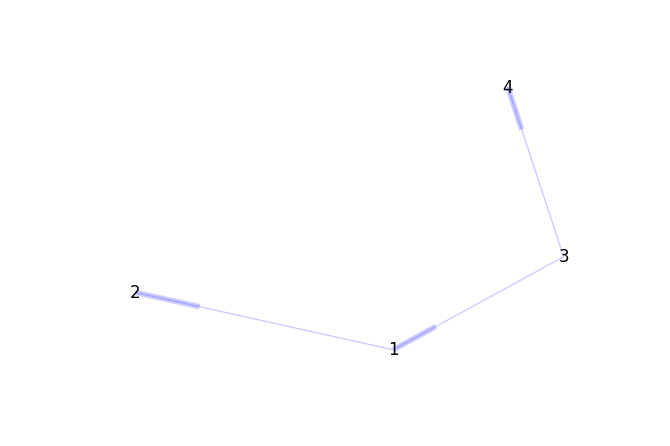

In [29]:
nx.draw(DG, node_size=1500, edge_color='b', alpha=0.2, font_size=12, with_labels=True)

In [30]:
DG.out_degree(1, weight='weight')

0.5

In [31]:
DG.out_degree(1)

1

In [32]:
DG.in_degree(1, weight='weight')

0.75

In [33]:
DG.degree(1, weight='weight')

1.25

In [34]:
DG.successors(1)

[2]

In [35]:
DG.neighbors(1)

[2]

In [36]:
DG.in_degree(1, weight='weight')

0.75

In [37]:
DG.add_edge(2, 1, weight=0.15)

In [38]:
DG.in_degree(1, weight='weight')

0.9

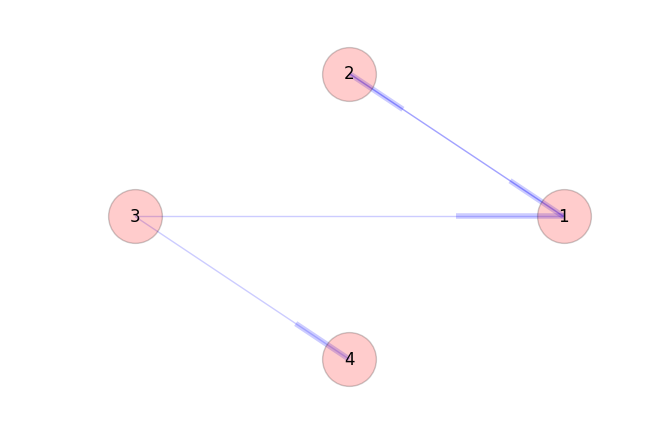

In [39]:
nx.draw_circular(DG, node_size=1500, edge_color='b', alpha=0.2, font_size=12, with_labels=True)

In [50]:
nx.pagerank(DG, alpha=0.85)

{1: 0.4375451752132807,
 2: 0.4266419405424482,
 3: 0.054730093114975384,
 4: 0.08108279112929591}

In [41]:
nx.degree(DG)

{1: 3, 2: 2, 3: 2, 4: 1}

Multigraphs can be used to have multiple edges between the same nodes. Some algorithms are not well defined for multigraphs.

### Classic graphs

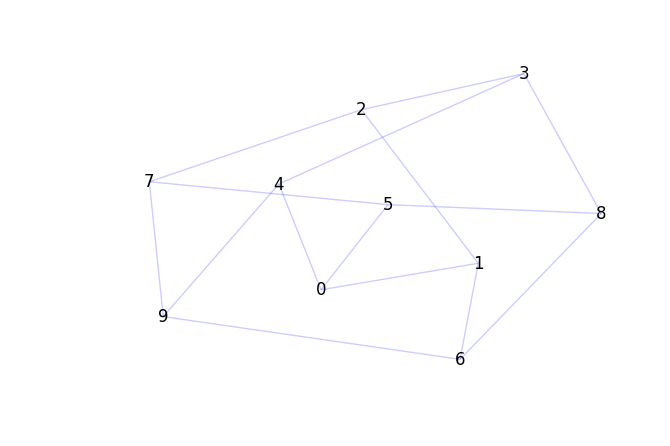

In [42]:
petersen = nx.petersen_graph()
nx.draw(petersen, node_size=0, edge_color='b', alpha=0.2, font_size=12, with_labels=True)

In [43]:
petersen.neighbors(6)

[8, 1, 9]

In [44]:
nx.shortest_path(petersen, 4, 2)

[4, 3, 2]

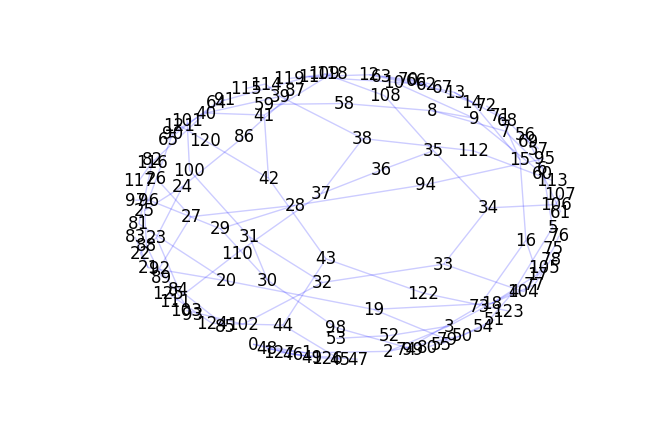

In [45]:
red=nx.random_lobster(35,0.9,0.9)
nx.draw(red, node_size=0, edge_color='b', alpha=0.2, font_size=12, with_labels=True)

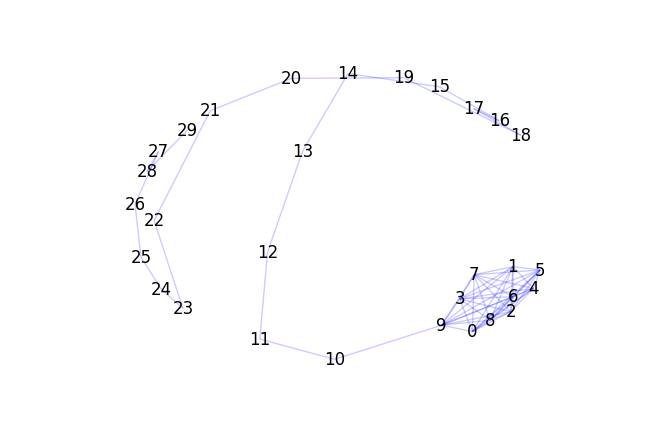

In [46]:
lollipop=nx.lollipop_graph(10,20)
nx.draw(lollipop, node_size=0, edge_color='b', alpha=0.2, font_size=12, with_labels=True)

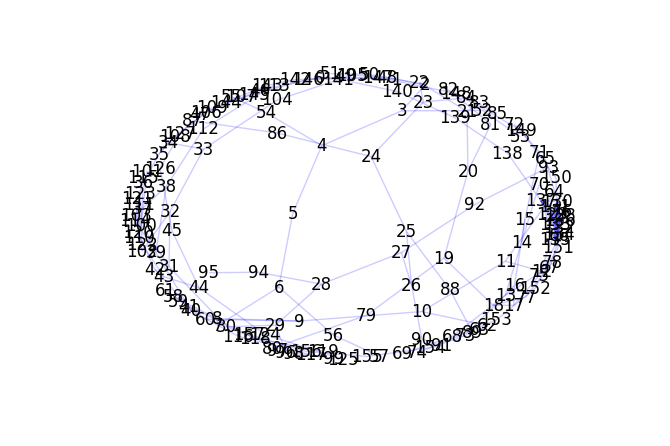

In [47]:
cmb = nx.disjoint_union(red, lollipop)
nx.draw(cmb, node_size=0, edge_color='b', alpha=0.2, font_size=12, with_labels=True)

In [48]:
nx.shortest_path(cmb, 37, 59)

[37,
 36,
 35,
 34,
 33,
 32,
 31,
 30,
 29,
 28,
 27,
 26,
 25,
 24,
 23,
 22,
 21,
 20,
 19,
 18,
 17,
 16,
 15,
 14,
 13,
 12,
 11,
 10,
 9,
 8,
 58,
 59]

In [49]:
dt = nx.dfs_tree(cmb, 28)